## PROJECT SUMMARY:
### Goal: Predict daily bike rental counts based on environmental and seasonal data.
## Tasks:
### 1. Perform Exploratory Data Analysis and Data Cleaning.
### 2. Build and evaluate multiple machine learning models.
### 3. Select the best model based on performance.
### 4. Report feature importance and any challenges faced.


In [2]:
# IMPORT LIBRARIES
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#LOAD DATASET (day.csv)
df=pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
# Display the first 5 rows of the dataset
df.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Display the last 5 rows of the dataset
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
# Display the summary information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Generate descriptive statistics of the numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Cleaning


In [9]:
# Check for missing (null) values in each column
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Check for duplicate rows in the dataset
print(df.duplicated().sum())

0


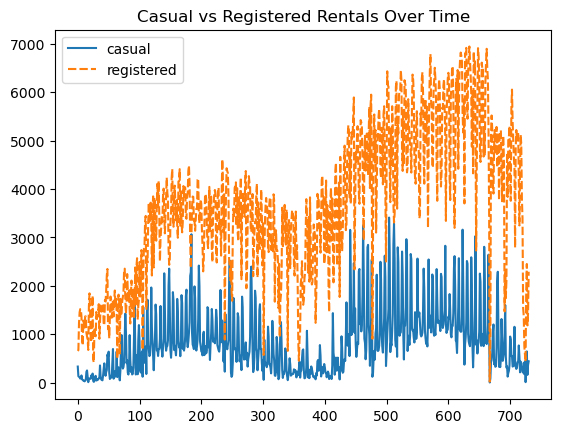

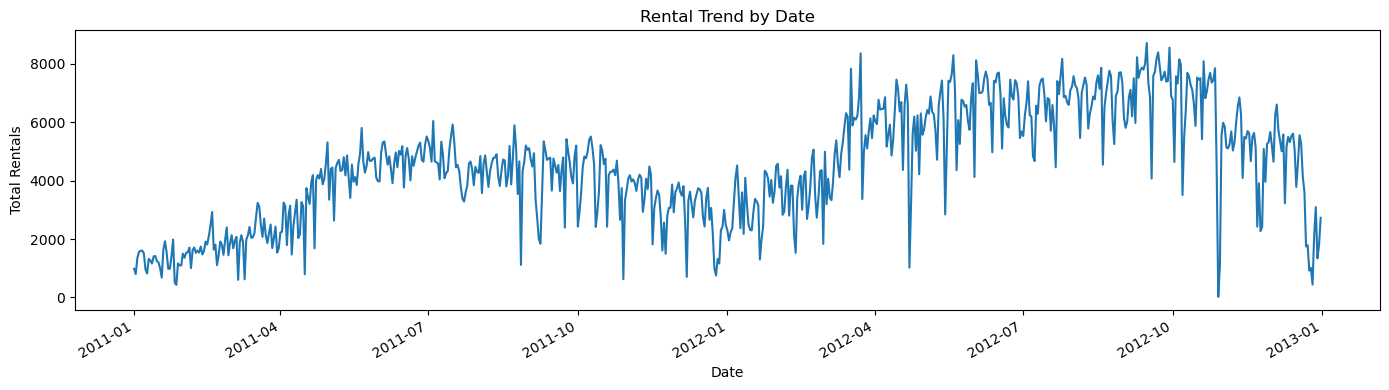

In [11]:
#Plot line charts of casual and registered user rental
sns.lineplot(data=df[['casual', 'registered']])
plt.title("Casual vs Registered Rentals Over Time")
plt.show()

# Convert the 'dteday' column to datetime format
# This is necessary for time series plotting and proper date handling
df['dteday'] = pd.to_datetime(df['dteday'])

plt.figure(figsize=(14,4))
plt.plot(df['dteday'], df['cnt'])
plt.title("Rental Trend by Date")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.gcf().autofmt_xdate()  # Automatically formats x-axis dates for better readability
plt.tight_layout()
plt.show()



In [12]:
#  Drop unnecessary columns from the dataset
df.drop(['casual', 'registered', 'instant', 'dteday'], axis=1, inplace=True)

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## EDA

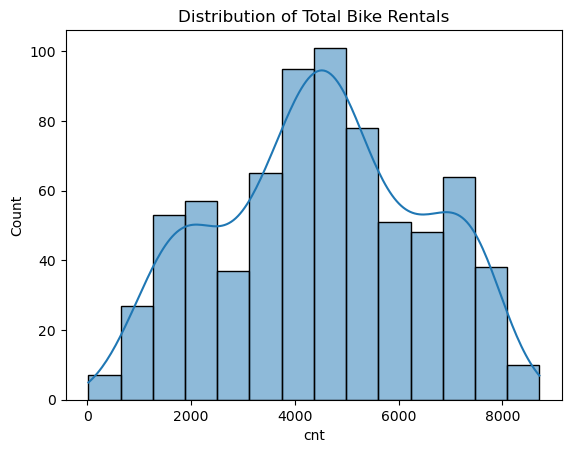

In [15]:
# Plot the distribution of the target variable 'cnt' (total bike rentals)
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.show()

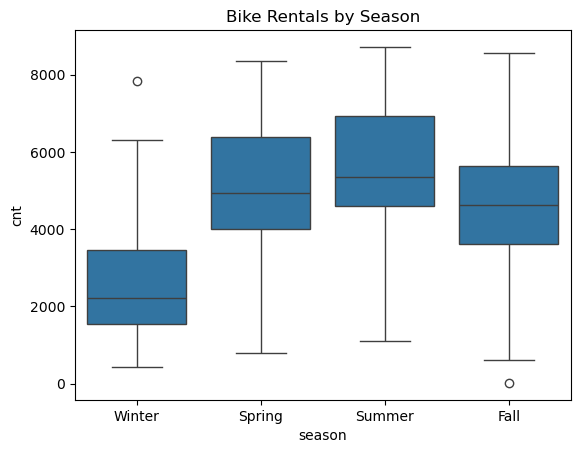

In [16]:
#  Create a boxplot to show the distribution of bike rentals across seasons
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
# You can replace the numeric labels with actual season names for a better plot
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

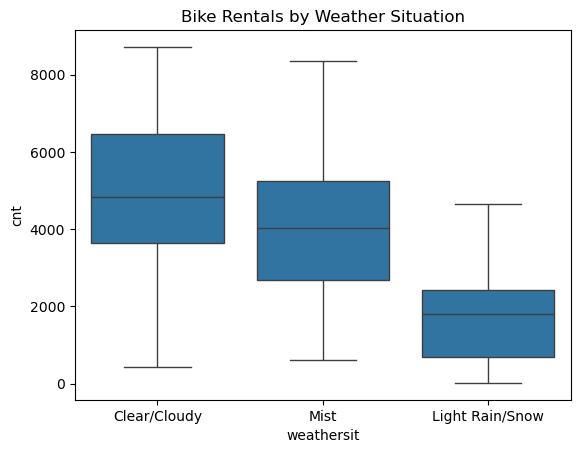

In [17]:
#  Create a boxplot showing how different weather conditions affect bike rentals
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xticks(ticks=[0, 1, 2], labels=['Clear/Cloudy', 'Mist', 'Light Rain/Snow'])
plt.show()

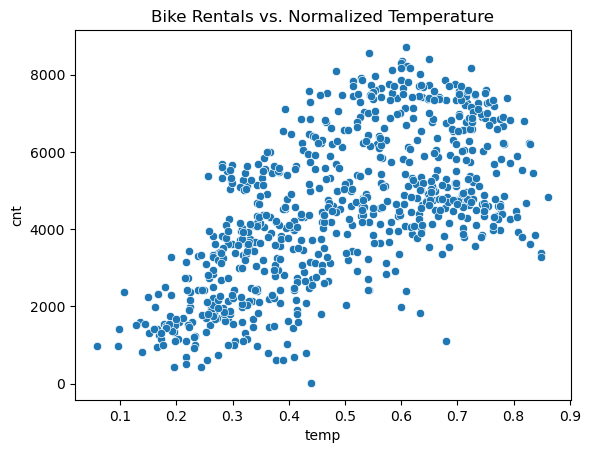

In [18]:
# Create a scatter plot to analyze the relationship between temperature and total bike rentals
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Bike Rentals vs. Normalized Temperature')
plt.show()

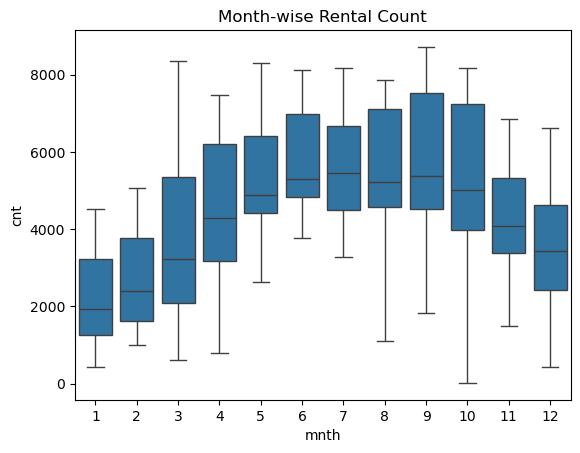

In [19]:
#Create a boxplot to visualize bike rental patterns across different months
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Month-wise Rental Count')
plt.show()


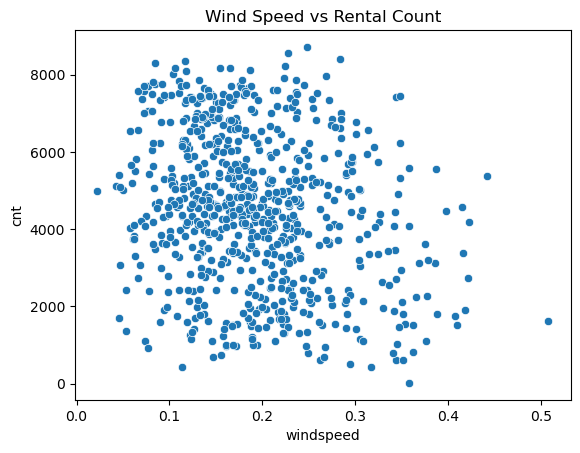

In [20]:
# Create a scatter plot to examine the effect of wind speed on bike rental count
sns.scatterplot(x='windspeed', y='cnt', data=df)
plt.title('Wind Speed vs Rental Count')
plt.show()

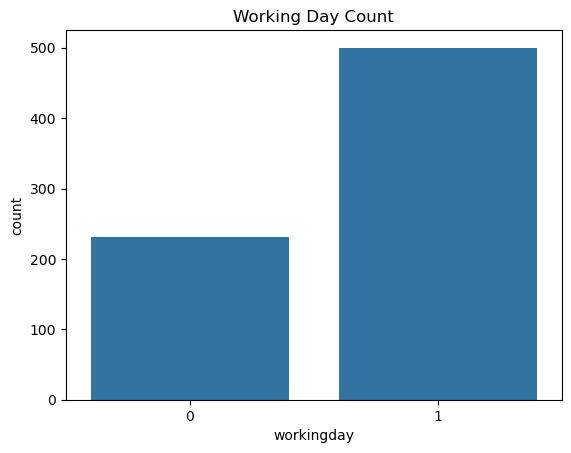

In [21]:
# Create a count plot to show the number of working vs non-working days in the dataset
sns.countplot(x='workingday', data=df)
plt.title('Working Day Count')
plt.show()

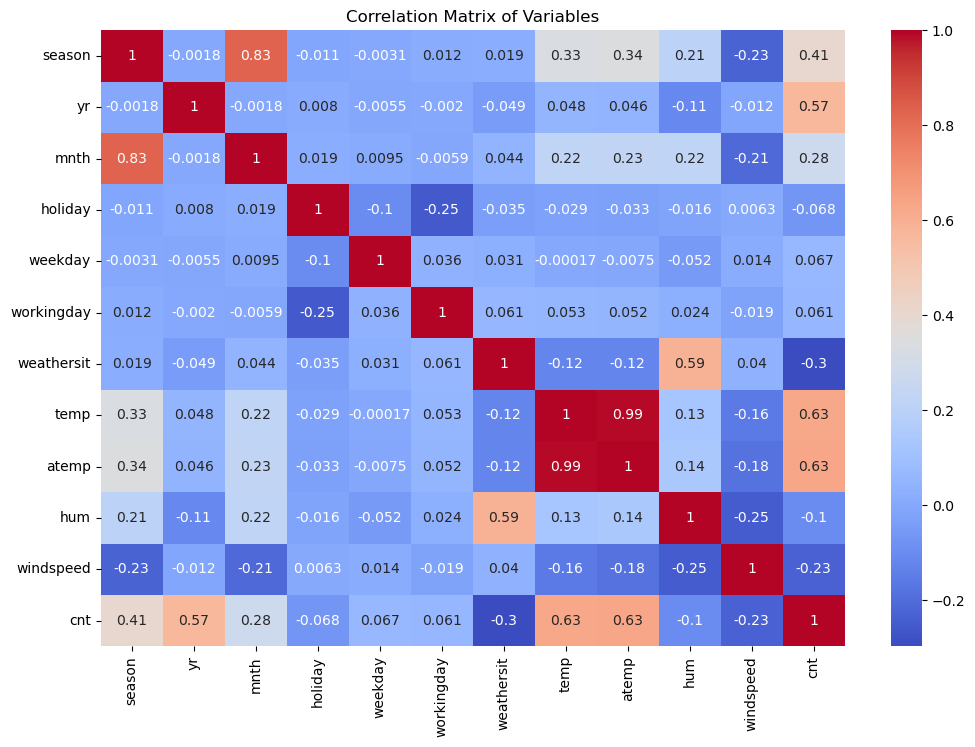

In [22]:
# Create a correlation heatmap to understand relationships between numeric features
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

## Feature Engineering 


In [24]:
# Convert categorical columns into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [25]:
df_encoded.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,985,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.353739,0.696087,0.248539,801,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,...,False,False,False,False,True,False,False,False,False,False


In [26]:
df_encoded.shape

(731, 30)

In [27]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('cnt', axis=1)
y = df_encoded['cnt']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([6276.97773973, 1340.97773973, 3204.41326613, 4930.33111483,
       8708.97773973, 6492.97773973,  572.41326613, 2620.97773973,
       6332.41326613, 7036.97773973, 3758.18440116, 2644.41326613,
       5652.97773973, 5156.97773973, 3052.97773973, 2362.35769405,
       2484.97773973, 7268.97773973, 4924.97773973, 2332.97773973,
       6380.97773973, 7508.97773973, 5612.97773973, 1652.97773973,
       1084.41326613, 4044.97773973, 1844.41326613, 8164.97773973,
       3748.97773973, 5956.97773973, 2987.68220066, 4124.41326613,
       6268.97773973, 7372.97773973, 6308.97773973, 4724.11519446,
       5956.41326613, 5441.21612906, 2796.41326613, 1052.41326613,
       4380.97773973, 4644.97773973, 6364.97773973, 4718.29201143,
       6452.97773973, 1021.41654784, 4404.97773973, 4972.97773973,
       5940.97773973, 4101.63802256, 3724.41326613, 2721.69810143,
       2604.5116275 , 5163.04267568, 4644.97773973, 4708.41326613,
       5764.41326613, 2957.15548881, 4194.64690465, 5996.41326

In [30]:
# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)


Linear Regression Results:
MAE: 641.3339878957812
MSE: 749878.201150333
RMSE: 865.9550803305752
R2 Score: 0.8129924653186673


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([6384.13, 1510.5 , 3538.  , 4674.84, 7590.04, 7401.39, 1410.07,
       2050.21, 6931.18, 6309.18, 1966.24, 2762.07, 4981.87, 4921.57,
       2052.94, 2014.34, 2274.83, 7643.59, 5036.8 , 2485.75, 7397.43,
       5216.8 , 5191.73, 1710.03, 1668.35, 4586.94, 2007.52, 7230.96,
       3366.89, 5248.59, 2908.49, 4062.4 , 6577.28, 7324.28, 6334.27,
       5297.58, 7060.55, 6172.8 , 3319.81,  931.64, 4225.47, 2998.11,
       7175.32, 4380.71, 7028.8 , 2551.08, 4396.4 , 6076.11, 6647.59,
       4643.06, 4257.38, 2833.4 , 1925.57, 4348.15, 4606.23, 4329.21,
       4130.87, 3490.36, 4289.92, 6353.59, 6601.33, 6993.28, 1946.19,
       7347.74, 6523.  , 6345.4 , 5955.67, 4235.43, 1604.32, 7786.25,
       4314.03, 1938.11, 3467.49, 4439.24, 4354.09, 3833.13, 4712.01,
       4466.94, 1349.56, 4184.95, 2499.84, 1963.08, 4834.72, 4607.81,
       3634.33, 3273.51, 4321.16, 3738.34, 3583.1 , 3281.49, 1393.82,
       7003.49, 5507.36, 5926.49, 2488.  , 2335.8 , 4721.49, 2676.46,
       3975.59, 4855

In [33]:
# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)


Random Forest Results:
MAE: 476.9848979591837
MSE: 531008.04847483
RMSE: 728.702990576291
R2 Score: 0.8675751530196626


### GradientBoosting

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)
y_pred_gb



array([6454.75021328, 1525.00506608, 3818.10221023, 4455.64820624,
       7804.12550272, 7024.46166968, 1567.30537155, 2021.98373097,
       7209.14928939, 6738.92640701, 2117.95771815, 3049.33693307,
       4767.57978759, 4690.37702823, 2429.31713244, 2200.0850419 ,
       2427.50024486, 7685.96962248, 5113.09562992, 2236.62386182,
       7212.58243209, 5921.53727344, 4627.11074191, 1900.922845  ,
       1346.12663595, 4703.73669186, 1816.01610722, 7790.43774256,
       3274.04260437, 5428.23379857, 2816.50669613, 4660.94526161,
       6757.25393768, 7341.84858059, 6338.49248104, 5312.57756086,
       6958.96084473, 6538.06436996, 3539.11034959, 1144.86807574,
       4331.20367709, 3173.77820249, 6823.89553215, 4449.38296775,
       6922.49095046, 1824.9900024 , 4555.52527082, 6372.26576898,
       6541.89966521, 4531.47418513, 4154.21186716, 2702.48506139,
       2118.55688053, 3890.54574986, 4703.73669186, 4672.30494177,
       3400.27229069, 3717.32847784, 4073.52354451, 6124.90201

In [36]:
# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Results:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R2 Score:", r2_gb)

Gradient Boosting Results:
MAE: 485.2322894154659
MSE: 461339.1234025448
RMSE: 679.2194957468056
R2 Score: 0.8849494598093256


### XG Boost

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
xgb = XGBRegressor(random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("XGBoost Regressor Results:")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R2 Score:", r2_xgb)



XGBoost Regressor Results:
MAE: 463.7555184915763
MSE: 447629.43846243864
RMSE: 669.0511478672155
R2 Score: 0.8883684277534485


In [39]:
# Create a comparison table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_gb, mae_xgb],
    'MSE': [mse_lr, mse_rf, mse_gb, mse_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb, rmse_xgb],
    'R2 Score': [r2_lr, r2_rf, r2_gb, r2_xgb]
})
results.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)


,Model,MAE,MSE,RMSE,R2 Score
0,XGBoost,463.755518,447629.438462,669.051148,0.888368
1,Gradient Boosting,485.232289,461339.123403,679.219496,0.884949
2,Random Forest,476.984898,531008.048475,728.702991,0.867575
3,Linear Regression,641.333988,749878.201150,865.955080,0.812992


### Feature Importance

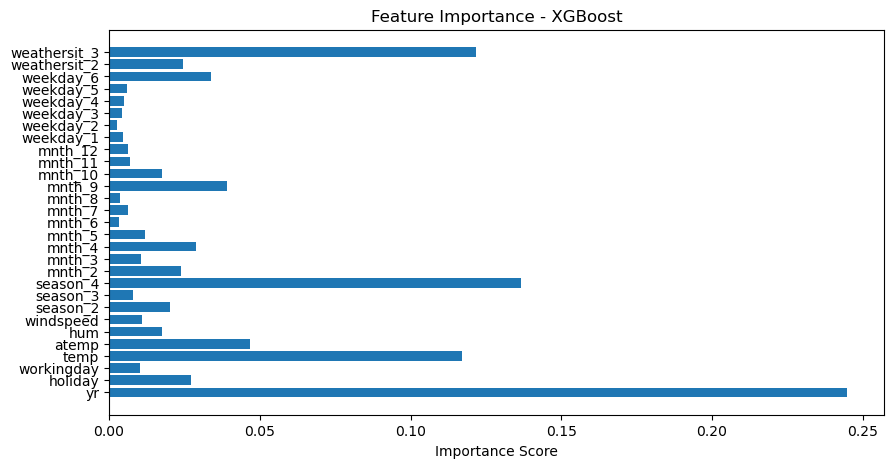

In [41]:
import matplotlib.pyplot as plt

# For XGBoost feature importance
importances = xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,5))
plt.barh(features, importances)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()

###  Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# Grid search
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

# Best model
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

#valuate best model
y_pred_best_rf = best_rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.874930325509658


####  Challenges Faced and Solutions

1. **Missing column understanding (e.g., 'hr' not in day.csv)**  
   → Solved by analyzing both datasets and selecting `day.csv` for daily prediction.

2. **Choosing columns to drop**  
   → Columns like `instant`, `dteday`, `casual`, and `registered` were dropped after visualization.

3. **Categorical data handling**  
   → Converted `season`, `month`, `weekday`, and `weather` into numeric using one-hot encoding.

4. **Model selection confusion**  
   → Trained 4 models and compared metrics to finalize the best one.

5. **Feature importance confusion**  
   → Understood that some features like `yr` may look important statistically, but don’t always make future predictions reliable.

6. **Hyperparameter tuning confusion**  
   → Tuned Random Forest to learn the concept, but XGBoost still outperformed.


#### Conclusion: Among all models tested, XGBoost performed the best with the lowest error scores and the highest R² value.Thus, XGBoost was selected as the final model for bike rental prediction.